In [77]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# load dataset
df = pd.read_csv('data/train.csv')
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


## Data Overview

In [79]:
df.describe

<bound method NDFrame.describe of               id  breath_id   R   C  time_step       u_in  u_out   pressure
0              1          1  20  50   0.000000   0.083334      0   5.837492
1              2          1  20  50   0.033652  18.383041      0   5.907794
2              3          1  20  50   0.067514  22.509278      0   7.876254
3              4          1  20  50   0.101542  22.808822      0  11.742872
4              5          1  20  50   0.135756  25.355850      0  12.234987
...          ...        ...  ..  ..        ...        ...    ...        ...
6035995  6035996     125749  50  10   2.504603   1.489714      1   3.869032
6035996  6035997     125749  50  10   2.537961   1.488497      1   3.869032
6035997  6035998     125749  50  10   2.571408   1.558978      1   3.798729
6035998  6035999     125749  50  10   2.604744   1.272663      1   4.079938
6035999  6036000     125749  50  10   2.638017   1.482739      1   3.869032

[6036000 rows x 8 columns]>

In [80]:
# describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [81]:
df.shape

(6036000, 8)

## Missing values

In [82]:
# check for missing values
df.isnull().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

## Outliers

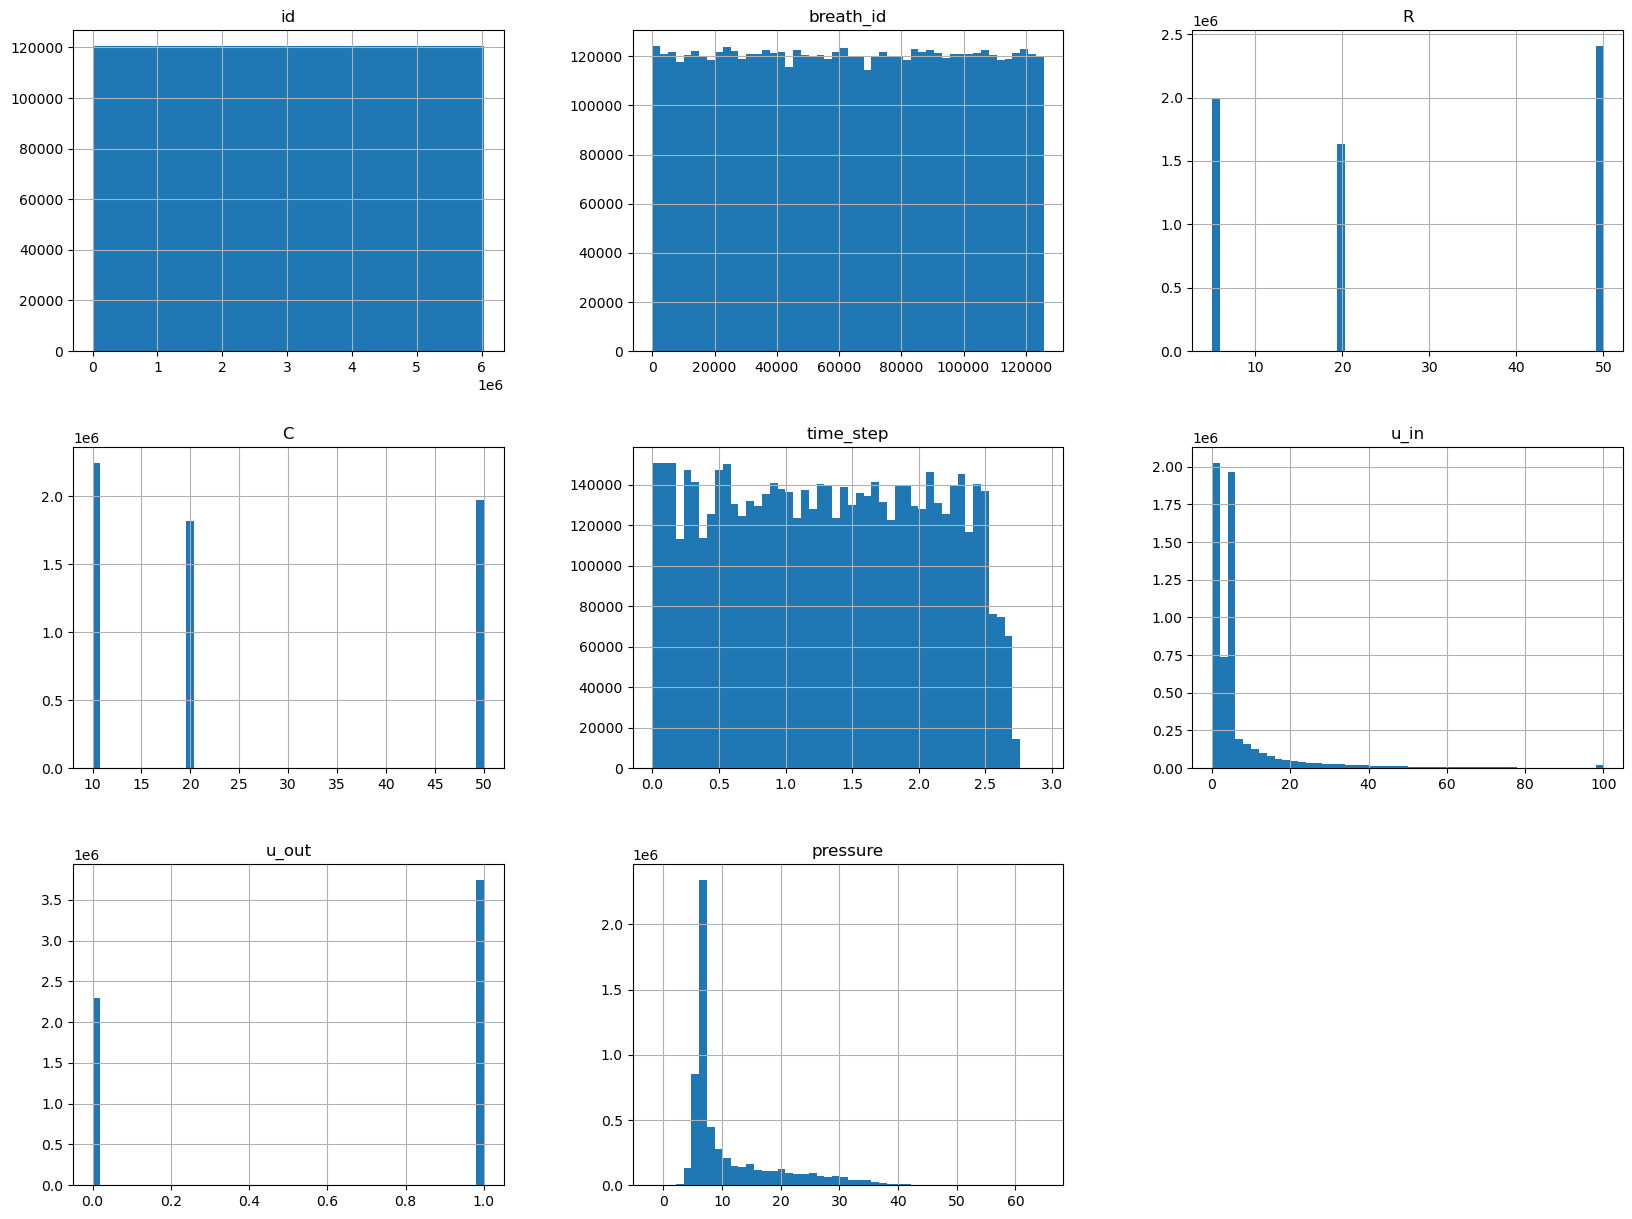

In [83]:
# plot histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

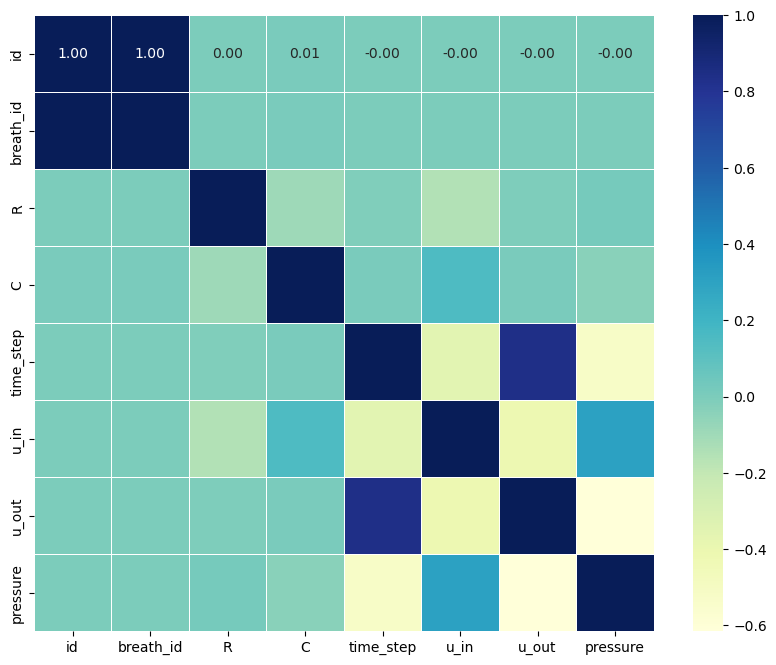

In [84]:
# plot heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

In [85]:
# drop the breath_id column
df.drop('breath_id', axis=1, inplace=True)
df.head()

,id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.000000,0.083334,0,5.837492
1,2,20,50,0.033652,18.383041,0,5.907794
2,3,20,50,0.067514,22.509278,0,7.876254
3,4,20,50,0.101542,22.808822,0,11.742872
4,5,20,50,0.135756,25.355850,0,12.234987


In [86]:
# drop the id column
df.drop('id', axis=1, inplace=True)
df.head()

,R,C,time_step,u_in,u_out,pressure
0,20,50,0.000000,0.083334,0,5.837492
1,20,50,0.033652,18.383041,0,5.907794
2,20,50,0.067514,22.509278,0,7.876254
3,20,50,0.101542,22.808822,0,11.742872
4,20,50,0.135756,25.355850,0,12.234987


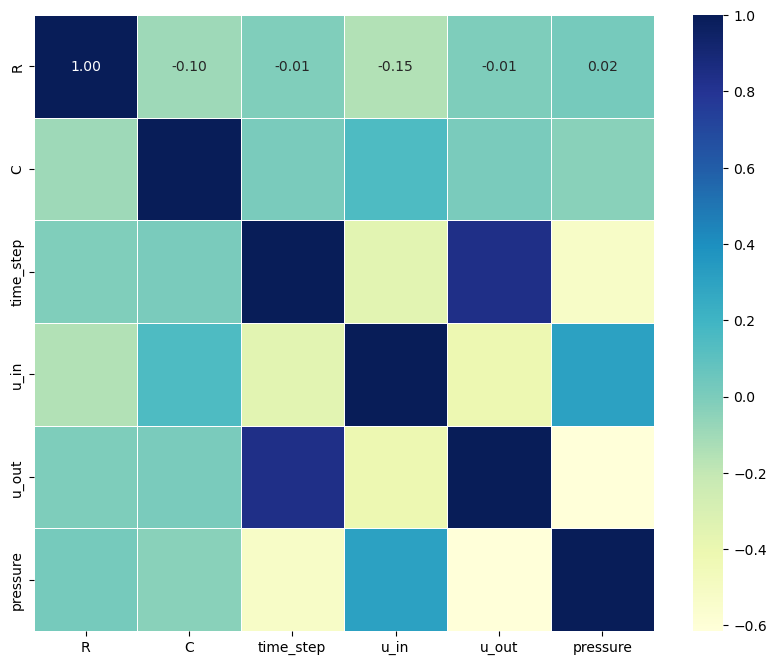

In [87]:
# plot heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

## Split the data

In [88]:
# split the dataset
X = df.drop('pressure', axis=1)
y = df['pressure']

In [89]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the data

In [90]:
# train the model using logistic regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# evaluate the model
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

3.948366083837123

## Prediction

In [92]:
# predict the test set
y_pred = model.predict(X_test)
y_pred

array([ 7.61867166,  6.79909652, 17.9032465 , ..., 20.30079866,
        7.64275443, 16.95026485])

In [93]:
# show error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Absolute Error: 3.948366083837123
Mean Squared Error: 40.53560335356404


In [94]:
# show the first 9 predictions
y_pred[:9]

array([ 7.61867166,  6.79909652, 17.9032465 ,  7.83773235, 17.67577913,
       17.38585605, 16.78626698, 17.4027229 ,  7.57837857])

## Test data

In [95]:
test = pd.read_csv('data/test.csv')
test.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


In [96]:
# display all the missing values
test.isnull().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64

In [97]:
# drop the breath_id column
test.drop('breath_id', axis=1, inplace=True)
test.head()

,id,R,C,time_step,u_in,u_out
0,1,5,20,0.000000,0.000000,0
1,2,5,20,0.031904,7.515046,0
2,3,5,20,0.063827,14.651675,0
3,4,5,20,0.095751,21.230610,0
4,5,5,20,0.127644,26.320956,0


In [107]:
# Replace 'feature1', 'feature2', etc., with the actual feature names used in training
relevant_columns = ['C', 'time_step','u_in', 'u_out','R']  # Add all training features here
test_filtered = test[relevant_columns]

In [109]:
# Example: Print the column names of test_filtered
print(test_filtered.columns)

# Compare this output with the feature names used during training

Index(['C', 'time_step', 'u_in', 'u_out', 'R'], dtype='object')
